## Libraries

In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [ ]:
glass = pd.read_csv("glass.csv",names=["ID","RI","Na","MG","Al","Si","K","Ca","Ba","Fe","type"])
target = glass["type"]
glass = glass.drop(["type"], axis=1)
glass.head()

## Missing values

In [79]:
print(glass.isnull().sum().sum())
print(target.isnull().sum())

0
0


## Train test split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(glass,target,test_size = 0.3)

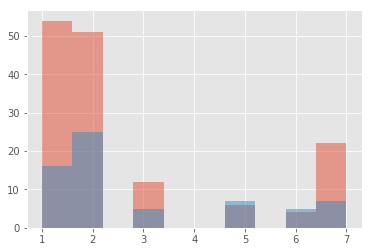

In [66]:
plt.style.use("ggplot")
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

## Data Visualization

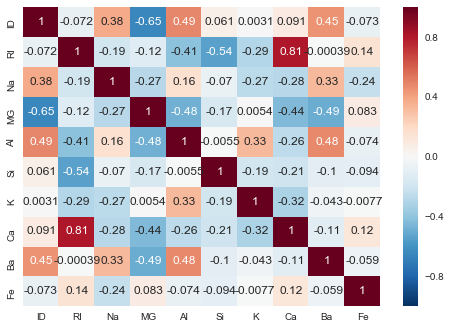

In [150]:
sns.heatmap(glass.corr(), annot=True)
plt.show()

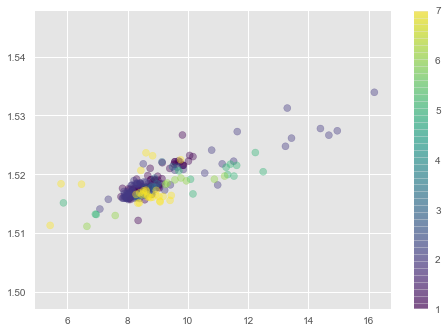

In [182]:
plt.style.use("ggplot")
plt.scatter(x=glass["Ca"],y=glass["RI"],marker='o',c=target,cmap='viridis', alpha = 0.4)
plt.colorbar()
plt.show()